# FoML Assignment 1
> Foundations of Machine Learning CS5590  Assignment 1

- toc: true 
- badges: false
- comments: true
- categories: [Quizzes and assignments - Foundations of Machine Learning ]
- author: Abhishek Kumar Dubey

# Questions

## Q. 1.


-  __k-NN: (8 marks)__ In $k$-nearest neighbors $(k-NN)$, the classification is achieved by majority vote in the vicinity of data. Given $n$ points in a 2-dimensional space, consider two settings:
    - __Setting $A$:__ imagine _two_ classes of data each of $n/2$ points, which are overlapped to some extent in the space.
    - __Setting $B$:__ imagine _three_ classes of data each of $n/3$ points, which are overlapped to some extent in the space.<br>Now, answer the following questions:
        - $(a)$ __(2 marks)__ Describe what happens to the training error (using all available data) when the neighbor size $k$ varies from $n$ to $1$ in Setting $A$. How does this behavior change in Setting $B$?
        - $(b)$ __(3 marks)__ Predict and explain with a sketch how the generalization error (e.g. holding out some data for testing) would change when $k$ varies in both settings? Explain your reasoning.
        - $(c)$ __(3 marks)__ Is it possible to build a univariate decision tree $($ with decisions at each node of the form “is $x > a$”, “is $x < b$”, “is $y > c$”, or “is $y < d$” for any real constants $a, b, c, d$ $)$ which classifies exactly similar to a $1-NN$ using the Manhattan (city block) distance? If so, give an example of a dataset setup where this can happen. If not, explain why not.

### Answer


- $(a)$ 
    - Setting A: As the value of $k$ is varied for $n$ to $1$ the error starts to decrease , becomes 'almost' constant after forming elbow like shape and then the error becomes $0$ when $k$ becomes $1$ but error may not reduce gradually, it may fluctuate depending on the noise present in the data. The training error becomes $0$ at $k=1$, this can also be called as over fitting.  
    - Setting B: The error  starts to decrease as value of $k$ is varied form $n$ to $1$ and becomes $0$ at $k=1$, the difference here is that it takes time for the error to become 'almost' constant  as value of $k$ is varied from $n$ to $1$, i.e. the elbow point appears later as compared to setting $A$ when  the value of $k$ is varied from $n$ to $1$
- $(b)$ Generalization error is plotted in below picture's right most column (instead of hand sketch), The generalization error will also decrease in both the setting as value of $k$ is varied from $n$ to $1$,  error becomes constant after forming elbow shape, but when value of $k$ is further reduced the model starts to over-fit and when $n$ becomes $1$ the generalization error increases by a significant amount , as the model highly over fits to the data at this point. The difference among the two settings is that the elbow point appears earlier in setting $A$ and later in setting $B$ as the value of $k$ is varied from $n$ to $1$.

Below is the proof of answer given above for setting $A$ and $B$<br> 

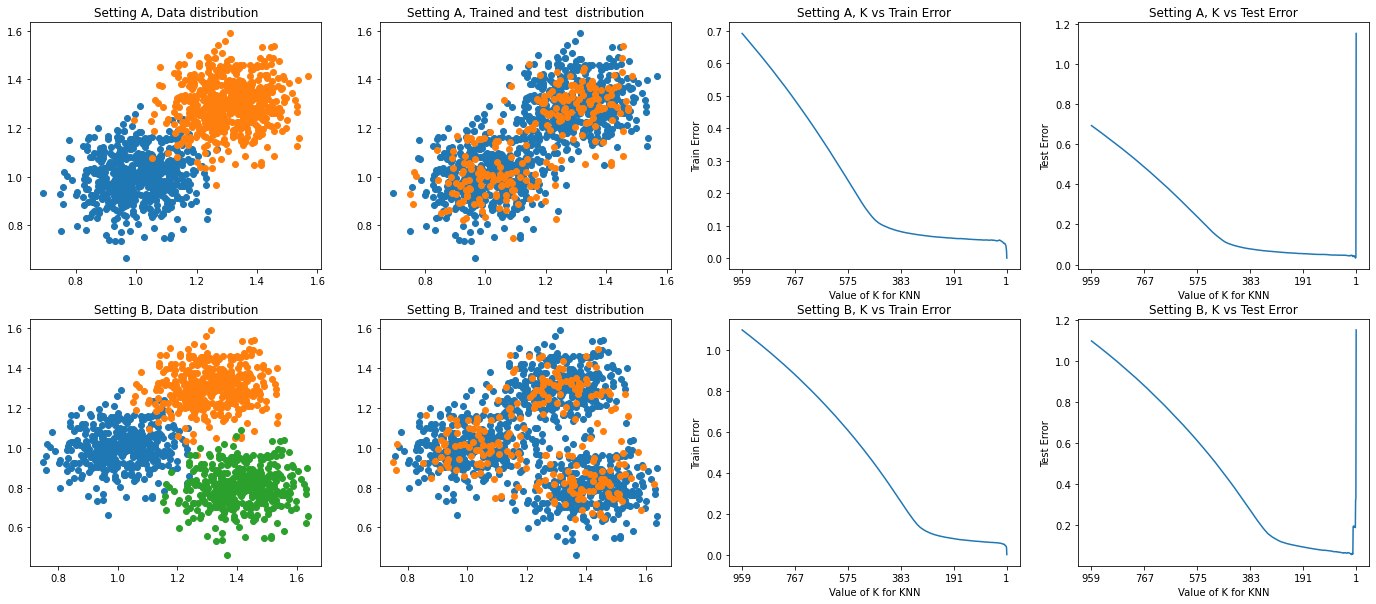

In [168]:
#collapse-hide
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import StratifiedShuffleSplit
def get_multivariate(_mean,_cov,_numData,_class):
        np.random.seed(0)
        data = np.random.multivariate_normal(_mean,_cov,_numData)
        target = np.ones(_numData)*_class   
        return data,target    
def get_dataAndTarget(numData,numClass):
        meanA = [1,1]
        covA = [[0.01,0.001],
                [0.001,0.01]]
        meanB = [1.3,1.3]
        covB = [[0.01,0.001],
                [0.001,0.01]]
        meanC = [1.4,0.8]
        covC = [[0.01,0.001],
                [0.001,0.01]]
        if(numClass==3):
                dataA,targetA =  get_multivariate(meanA,covA,numData//3,0)
                dataB,targetB =  get_multivariate(meanB,covB,numData//3,1)
                dataC,targetC =  get_multivariate(meanC,covC,numData//3,2)
                data = np.vstack([dataA,dataB,dataC])
                target = np.hstack([targetA,targetB,targetC])
                return data,target
        if(numClass==2):
                dataA,targetA =  get_multivariate(meanA,covA,numData//2,0)
                dataB,targetB =  get_multivariate(meanB,covB,numData//2,1)
                data = np.vstack([dataA,dataB])
                target = np.hstack([targetA,targetB])
                return data,target
              
def runKNeighborsClassifier(numData,numClass):
        data ,target =  get_dataAndTarget(numData,numClass)
        sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
        train_index, test_index = list(sss.split(data, target))[0]
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]        
        k_range = range(1,X_train.shape[0])
        scores_list = []
        for k in k_range:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train,y_train)
                y_pred=knn.predict_proba(X_train)
                scores_list.append(metrics.log_loss(y_train,y_pred))               
        scores_list_test = []
        for k in k_range:
                knn = KNeighborsClassifier(n_neighbors=k)
                knn.fit(X_train,y_train)
                y_pred=knn.predict_proba(X_test)
                scores_list_test.append(metrics.log_loss(y_test,y_pred))
        return scores_list,scores_list_test,data,X_train, X_test,
num_data=1200
scores_list_2,scores_list_test_2,data_2,X_train_2, X_test_2 =runKNeighborsClassifier(num_data,2)     
scores_list_3,scores_list_test_3,data_3,X_train_3, X_test_3 =runKNeighborsClassifier(num_data,3)   
fig, ax = plt.subplots(2, 4, figsize=(24, 10))

ax[0,0].scatter(data_2[:num_data//2,0],data_2[:num_data//2,1])
ax[0,0].scatter(data_2[num_data//2:,0],data_2[num_data//2:,1]);
ax[0,0].set_title('Setting A, Data distribution')

ax[0,1].scatter(X_train_2[:,0],X_train_2[:,1])
ax[0,1].scatter(X_test_2[:,0],X_test_2[:,1]);
ax[0,1].set_title('Setting A, Trained and test  distribution')

ax[0,2].plot(scores_list_2)
ax[0,2].set_xlabel('Value of K for KNN')
ax[0,2].set_ylabel('Train Error');  
ax[0,2].set_title('Setting A, K vs Train Error')
ax[0,2].invert_xaxis()
ax[0,2].set_xticks(np.hstack([np.arange(len(scores_list_2),0,-len(scores_list_2)//5),1]))
ax[0,2].set_xticklabels(np.hstack([np.arange(len(scores_list_2),0,-len(scores_list_2)//5),1]))

ax[0,3].plot(scores_list_test_2)
ax[0,3].set_xlabel('Value of K for KNN')
ax[0,3].set_ylabel('Test Error');  
ax[0,3].set_title('Setting A, K vs Test Error')
ax[0,3].invert_xaxis();
ax[0,3].set_xticks( np.hstack([np.arange(len(scores_list_2),0,-len(scores_list_2)//5),1]))
ax[0,3].set_xticklabels(np.hstack([np.arange(len(scores_list_2),0,-len(scores_list_2)//5),1]))

ax[1,0].scatter(data_3[:num_data//3,0],data_3[:num_data//3,1])
ax[1,0].scatter(data_3[num_data//3:2*num_data//3,0],data_3[num_data//3:2*num_data//3,1]);
ax[1,0].scatter(data_3[2*num_data//3:,0],data_3[2*num_data//3:,1]);
ax[1,0].set_title('Setting B, Data distribution')

ax[1,1].scatter(X_train_3[:,0],X_train_3[:,1])
ax[1,1].scatter(X_test_3[:,0],X_test_3[:,1]);
ax[1,1].set_title('Setting B, Trained and test  distribution')

ax[1,2].plot(scores_list_3)
ax[1,2].set_xlabel('Value of K for KNN')
ax[1,2].set_ylabel('Train Error');  
ax[1,2].set_title('Setting B, K vs Train Error')
ax[1,2].invert_xaxis()
ax[1,2].set_xticks( np.hstack([np.arange(len(scores_list_3),0,-len(scores_list_3)//5),1]))
ax[1,2].set_xticklabels( np.hstack([np.arange(len(scores_list_3),0,-len(scores_list_3)//5),1]))

ax[1,3].plot(scores_list_test_3)
ax[1,3].set_xlabel('Value of K for KNN')
ax[1,3].set_ylabel('Test Error');  
ax[1,3].set_title('Setting B, K vs Test Error')
ax[1,3].invert_xaxis();
ax[1,3].set_xticks(np.hstack([np.arange(len(scores_list_3),0,-len(scores_list_3)//5),1]))
ax[1,3].set_xticklabels(np.hstack([np.arange(len(scores_list_3),0,-len(scores_list_3)//5),1]));

- $(c)$ Yes it is possible to build a univariate tree as described in the question, which classifies exactly similar to $1-NN$ using Manhattan distance.<br>
Below is the example of the dataset:<br>
For simplicity we consider $2$ class classification setting, in $2$ dimensional space, Class $A$ and Class $B$ each contains just one point:<br>
$A = {(1,3)}$<br>
$B = {(3,3)}$<br>
Consider value of $a=2,b=4,c=2$ and $d=4$<br>
    - Decision Tree:<br>
    consider point $a,b$ lies on $X$ axis and pint $d,c$ lies on $Y$ axis,Classes can be distinguished with just one question $x>a$ <br>
        - Point $(1,3)$: here $x=1,y=3$, if we make decision using the rules, $x>a$, it is false, hence we classify it for class $A$.
        - Point $(3,3)$: here $x=3,y=3$, if we make decision using the rules, $x>a$, it is true, $x<b$ is true,  $y>c$ is true, $y<d$ is true, hence we classify the point for class $B$
    - $1-NN$: <br>
    As the training dataset contains points $(1,3),(3,3)$ so any points which has $X$ value greater than $2$ will be classified to class $B$ and lesser will be classified for class $A$.
    
This is explained in below code and picture plotted :

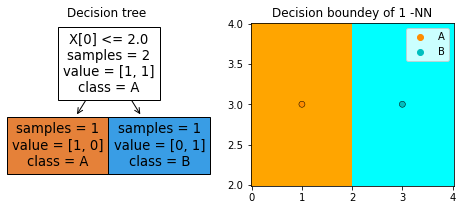

In [30]:
#collapse-hide
from sklearn import tree,neighbors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.inspection import DecisionBoundaryDisplay # Use scikit-learn version 1.1.0 to use Decision Boundary,  pip install scikit-learn==1.1.0
clf = tree.DecisionTreeClassifier()

X=np.array([[1,3],
            [3,3]])
y= [0,1]
className = ['A','B']
clf = clf.fit(X, y)
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
tree = tree.plot_tree(clf,ax=ax[0],filled=True,impurity=False,class_names=className)
ax[0].set_title('Decision tree ')


knn = neighbors.KNeighborsClassifier(n_neighbors=1,metric='cityblock')
knn.fit(X,y)
xx, yy = np.meshgrid(np.arange(0, 5, 0.1), np.arange(0, 5, 0.01))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
cmap_light = ListedColormap(["orange", "cyan"])
cmap_bold = ["darkorange", "c"]
DecisionBoundaryDisplay.from_estimator(knn,X,cmap=cmap_light,ax=ax[1],response_method="predict",plot_method="pcolormesh")
sns.scatterplot(x=X[:, 0], y=X[:, 1],hue=className,palette=cmap_bold,alpha=1.0,edgecolor="black")
ax[1].set_title('Decision boundey of 1 -NN');

## Q. 2.


- Bayes Classifier: (6 marks)
    - $(a)$ __(3 marks)__ Consider a classification problem with $K$ classes for which the feature vector $\phi$ has $M$ dimensions (categorical variables) each of which can take $L$ discrete states. Let the values of the dimensions be represented by a one-hot ($1$-of-$L$) binary coding scheme. Further suppose that, conditioned on the class $C_k$, the $M$ dimensions of $\phi$ are independent, so that the class-conditional density factorizes with respect to the feature vector components (also referred to as the naive Bayes assumption). Show that the quantities given below:<br>$$a_k=\ln p(\phi|C_k)p(C_k)$$ are linear function of the components  of $\phi$.
    - $(b)$ __(3 marks)__ You are now going to make a text classifier. To begin with, you attempt to classify documents as either _sport_ or _politics_. You decide to represent each document as a (row) vector of attributes describing the presence or absence of the following words.<br>  $X$ __= (goal,football,golf,defence,offence,wicket,office,strategy)__ <br> Training data from sport documents and from politics documents is represented below in a matrix in which each row represents the 8 attributes. $$\\
x_{politics}=\left\lbrack \begin{array}{cccccccc}
1 & 0 & 1 & 1 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 0 & 0 & 1 & 1\\
1 & 0 & 0 & 1 & 1 & 0 & 1 & 0\\
0 & 1 & 0 & 0 & 1 & 1 & 0 & 1\\
0 & 0 & 0 & 1 & 1 & 0 & 1 & 1\\
0 & 0 & 0 & 1 & 1 & 0 & 0 & 1
\end{array}\right\rbrack$$ $$\\
x_{sport} = \left\lbrack \begin{array}{cccccccc}
1 & 1 & 0 & 0 & 0 & 0 & 0 & 0\\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 0\\
1 & 1 & 0 & 1 & 0 & 0 & 0 & 1\\
1 & 1 & 0 & 1 & 1 & 0 & 0 & 0\\
0 & 0 & 0 & 1 & 0 & 1 & 0 & 0
\end{array}\right\rbrack$$ <br> Using a maximum likelihood naive Bayes classifier, what is the probability that the document $x = (1, 0, 0, 1, 1, 1, 1, 0)$ is about politics?

### Answer

- $(a)$ A function is said to be liner if it satisfies below two properties:
    - Distributive over addition: $f(x+a)=f(x)+f(a)$
    - Homogenous of Degree one: $f(ax)=af(x)$
    
    The give equation is : $a_k=\ln p(\phi|C_k)p(C_k)$
    - $\ln p(\phi+a|C_k)p(C_k) \\=\ln\left( p(\phi|C_k)+p(a|C_k)-p((a\cap\phi)|C_k) \right)p(C_k) \\= \ln\left( p(\phi|C_k)+p(a|C_k) \right)p(C_k)$,<br> as $\phi$ is independent of $a$ $p((a\cap\phi)|C_k)$ 
    - $a_k=\ln p(a\phi|C_k)p(C_k)=a\ln p(\phi|C_k)p(C_k)$
    

## Q. 3.



-   Model Selection: (__6 marks)__ Install the `pydataset` module (if you haven’t already):<br>
    
    ```
    from pydataset import data
    import pandas as pd
    melanoma_data = data ( 'Melanoma' , show_doc=True )
    ```
    The _Melanoma_ dataset consists of measurements of patients with malignant melanoma (a type of cancer). For each patient, the dataset specifies if the patient died or lived at the end of the trial. Moreover, some patients died due to causes unrelated to melanoma. Your task is to do the following: 
    - $(a)$ __(1 mark)__ Remove those patients who died due to causes unrelated to Melanoma, and plot patient status vs age and patient status vs thickness - for your own understanding. 
    - $(b)$ __(4 marks)__ Split the data into 80% training and 20% test set using random stratified sampling. Now, on the 80% training data, perform 3-fold cross-validation using a classifier to predict the status of the patient (do not use the 20% held-aside test data for cross-validation; we will use it later to study generalization performance). Also, remember to use stratified sampling inside cross-validation too. You are allowed to use any existing machine learning library of your choice: scikitlearn, pandas, Weka (we recommend scikitlearn) - but you should use only the decision tree, k-NN or the naive Bayes classifier (to align with what we have covered in class so far, random forests not allowed too). Report the mean of the three quantities (accuracy, precision, recall) on 3-fold cross-validation. 
    - $(c)$ __(1 mark)__ Once you have picked the best classification model in cross-validation, train the best-performing setting on the entire 80% training data, and report performance on the held-aside test set. Report your observation on how representative the training/ validation data was w.r.t test data. 
    - Deliverables:
        - Code 
        - Data splits (for us to verify your reported results)
        - Brief report (PDF) with your solutions for the above questions

### Answer

The Melanoma data has following attributes:,<br>
- time: survival time in days
- status: `1` died from melanoma, `2` alive, `3` dead from other causes.
- sex: `1` = male, `0` = female.
- age: age in years.
- year: year of operation.
- thickness: tumour thickness in mm.
- ulcer: `1` = presence, `0` = absence.


- $(a)$ :<br>


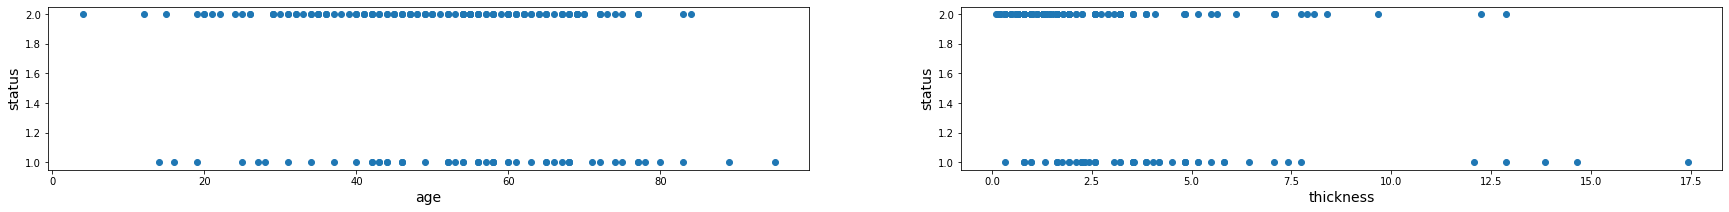

In [83]:
from pydataset import data
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
melanoma_data = data('Melanoma')
melanoma_data.drop(melanoma_data[melanoma_data['status']==3].index,inplace=True) # drp the data with status '3'
fig,ax = plt.subplots(1,2,figsize=(30, 3))
ax[0].scatter(melanoma_data['age'],melanoma_data['status'])
ax[0].set_xlabel('age',fontsize=14)
ax[0].set_ylabel('status',fontsize=14)
ax[1].scatter(melanoma_data['thickness'],melanoma_data['status'])
ax[1].set_xlabel('thickness',fontsize=14)
ax[1].set_ylabel('status',fontsize=14);

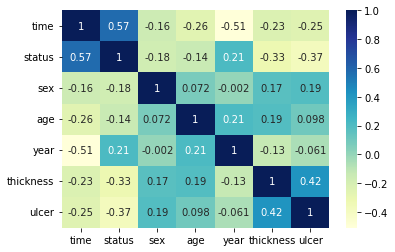

In [88]:
corr = melanoma_data.corr()
sns.heatmap(corr,cmap="YlGnBu", annot=True);

In [89]:
melanoma_data.head()

,time,status,sex,age,year,thickness,ulcer
3,35,2,1,41,1977,1.34,0
5,185,1,1,52,1965,12.08,1
6,204,1,1,28,1971,4.84,1
7,210,1,1,77,1972,5.16,1
9,232,1,1,49,1968,12.88,1


In [91]:
X = melanoma_data[['time','status','sex','age','year','thickness']].to_numpy()
y = melanoma_data['ulcer'].to_numpy()

In [133]:
from sklearn import tree,neighbors,naive_bayes 
import matplotlib.pyplot as plt
from sklearn import metrics
import seaborn as sns
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
dtree = tree.DecisionTreeClassifier()
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
nb = naive_bayes.GaussianNB()

sss1 = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
train_val_index, test_index = list(sss1.split(X, y))[0]
X_train_val, X_test = X[train_val_index], X[test_index]
y_train_val, y_test = y[train_val_index], y[test_index] 

sss2 = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0)


for train_index, val_index in sss1.split(X_train_val, y_train_val):
    X_train, X_val  = X_train_val[train_index], X_train_val[val_index]
    y_train, y_val  = y_train_val[train_index], y_train_val[val_index] 
    dtree = tree.DecisionTreeClassifier()
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    metrics.accuracy_score(y_val, y_pred)



## Q. 4.



-  Decision Trees: __(10 marks)__ In this question, you will use the Car Evaluation dataset, a popular dataset from the UCI Machine Learning Repository. It contains 1728 car sample information with 7 attributes, including one class feature that tells whether the car is in acceptable conditions (class labels: Unacceptable, Acceptable, VeryGood, Good). More details of the dataset description are available on https://archive.ics.uci.edu/ml/datasets/car+evaluation. You must not use the last column as an input feature when you classify the data. You can pre-process the variables into one-hot/ordinal values as you deem fit for each variable.
    - $(a)$ (5 marks) Decision Tree Implementation: Implement your own version of the decision tree using binary univariate split, entropy and information gain.
    - $(b)$ (2 marks) Cross-Validation: Evaluate your decision tree using 5-fold cross validation. (Divide the entire dataset into 5 parts using stratified sampling, and run this experiment; no test set is required for this question.) Report the average of the 5 folds’ accuracies. With correct implementation of both parts (decision tree and cross validation), your classification accuracy should be around 0.8.
    - $(c)$ (3 marks) Improvement Strategies: Now, try and improve your decision tree algorithm. Some things you could do include (not exhaustive):
        - Use Gini index instead of entropy
        - Use multi-way split (instead of binary split)
        - Use multivariate split (instead of univariate)
        - Prune the tree after splitting for better generalization
        Report your performance as an outcome of ANY TWO improved strategies.
    Deliverables:
    - Code
    - Brief report (PDF) with: (i) Accuracy of your initial implementation; (ii) Accuracy of your improved implementation, along with your explanation of why the accuracy improved with this change.